In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Loading data
**CIFAR10 dataset** contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


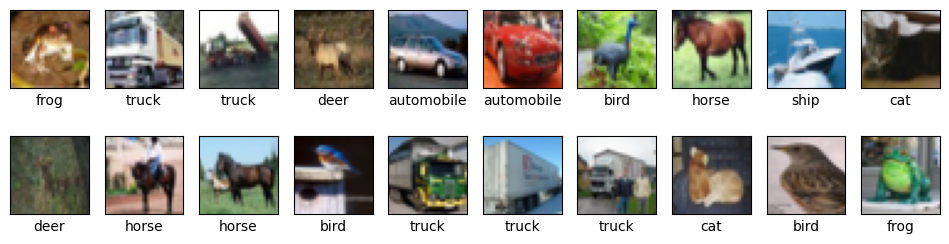

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

In [ ]:
for layer in model.layers:

    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d_3 (3, 3, 3, 32)
conv2d_4 (3, 3, 32, 64)
conv2d_5 (3, 3, 64, 64)


In [ ]:
# retrieve weights from the first conv layer
filters , bias = model.layers[0].get_weights()
filters # Total 32 filters

array([[[[-1.10731661e-01,  6.91345334e-03,  1.26065388e-01,
          -2.99099535e-02, -7.95805752e-02,  3.06122452e-02,
           5.24614453e-02, -2.56828964e-03,  4.16441262e-02,
           1.39044225e-02, -1.03126094e-01, -5.66669926e-02,
          -8.23719949e-02, -8.56090114e-02, -9.22977924e-05,
          -6.58878610e-02, -3.06950957e-02,  1.26690164e-01,
          -2.05198154e-02, -3.68335694e-02,  7.55500942e-02,
          -8.00978690e-02,  8.28672945e-03, -2.40060687e-03,
           7.67988563e-02, -4.14791480e-02,  4.56195325e-02,
          -3.81185412e-02,  1.19282320e-01,  5.91141284e-02,
          -8.22910815e-02,  3.40939015e-02],
         [ 8.68547261e-02, -1.34154513e-01,  7.58107603e-02,
           1.29255071e-01,  3.12721133e-02,  1.37931108e-02,
          -4.86861393e-02, -2.37664431e-02,  1.33750126e-01,
           1.31576583e-01, -3.81387770e-03, -6.02773130e-02,
          -1.27672151e-01, -5.66685200e-03, -1.58364326e-02,
           4.17057276e-02, -1.27274930e-

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

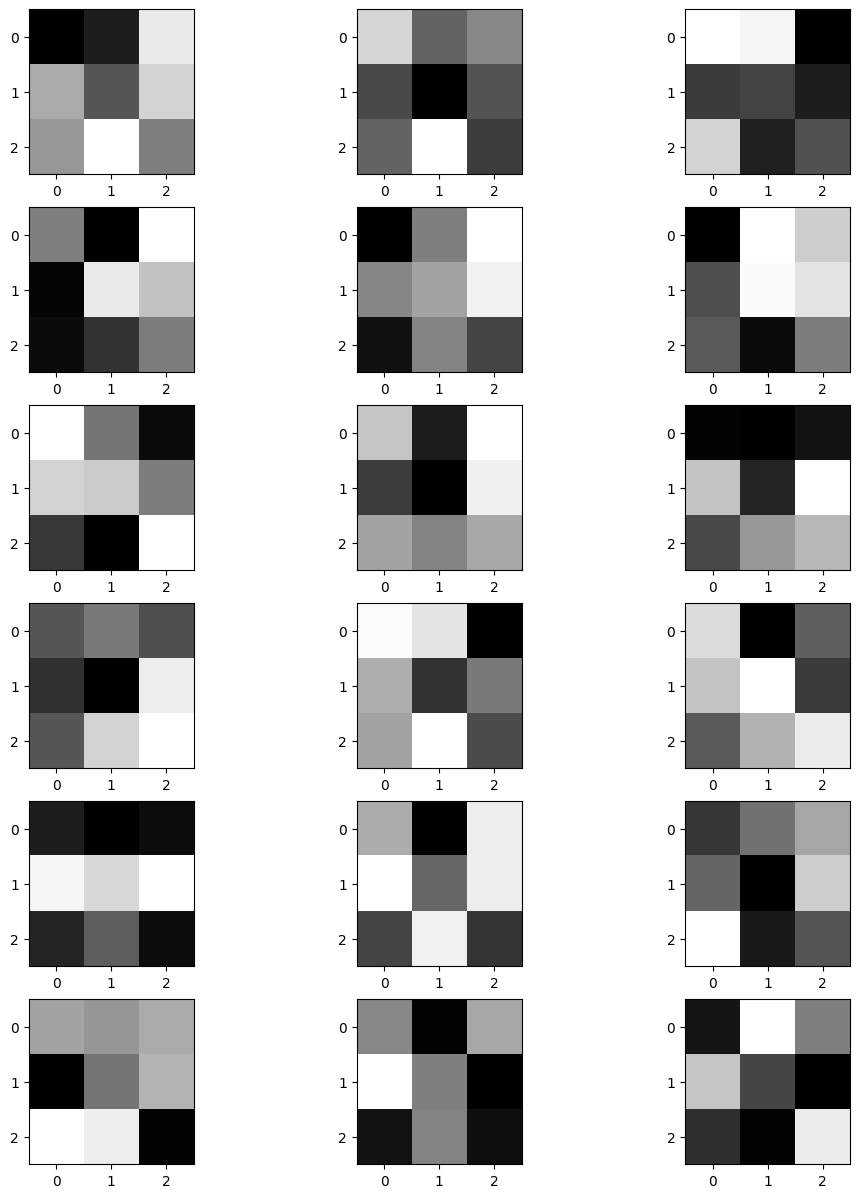

In [ ]:
# We will be visualising 6 filters out of 32 filters from 1st layer

n_filters =6
ix=1
fig = plt.figure(figsize=(12,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

The dark squares indicate small weights and the light squares represent large weights.

**SparseCategoricalCrossentropy:** Expects the target to be an int corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. **CategoricalCrossentropy:** Expects the target value of an example to be one-hot encoded where the value at the target index is 1, which the other N-1 entries are 0. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Early Stopping
**monitor:** “monitor” argument helps us select the performance measure that we want to track, such as validation loss or validation accuracy.

**mode:** mode can be set to ‘min’ or ‘max’ to monitor the minimum or maximum value, respectively. By default, it is set to ‘auto’ and automatically detects what we want to achieve, either maximizing the accuracy or minimizing the loss.

**patience:** Sometimes, the first time, we reach our lowest point in the validation loss the first time. It is not the best performance of our model. We can use ‘patience’ to set the number of epochs with no improvement after which the training is stopped.

**verbose:** To know the epoch number on which the training was stopped, we set the verbose to 1.

**restore_best_weights:** To keep the best weights once the training is stopped, we set this to True.

In [ ]:
# An epoch means training the neural network with all the
# training data for one cycle. Here I use 50 epochs

earlystop = EarlyStopping(monitor = 'val_loss', mode= 'min', patience = 25, verbose = 1, restore_best_weights = True)
history = model.fit(train_images, train_labels, epochs=50, callbacks = earlystop,
                    validation_data=(test_images, test_labels))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 12s 6ms/step - loss: 1.4379 - accuracy: 0.4891 - val_loss: 1.2555 - val_accuracy: 0.5625
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0721 - accuracy: 0.6224 - val_loss: 1.0756 - val_accuracy: 0.6213
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9329 - accuracy: 0.6693 - val_loss: 1.1111 - val_accuracy: 0.6208
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8485 - accuracy: 0.7018 - val_loss: 0.8272 - val_accuracy: 0.7132
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7836 - accuracy: 0.7247 - val_loss: 1.1100 - val_accuracy: 0.6331
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7373 - accuracy: 0.7404 - val_loss: 1.0964 - val_accuracy: 0.6349
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7026 - accuracy: 0.7517 - val_loss: 1.0234 - val_accuracy: 0.6658

313/313 - 1s - loss: 0.8041 - accuracy: 0.7403 - 677ms/epoch - 2ms/step


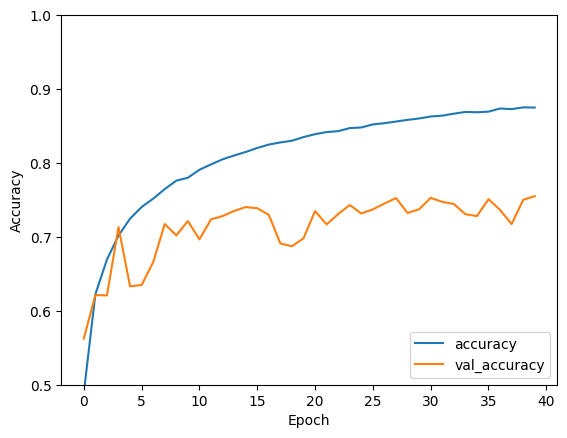

In [ ]:
# Evaluate the model

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels) #batch size = 32
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8041 - accuracy: 0.7403
Test accuracy: 0.7402999997138977


In [ ]:
test_predicted = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predicted_classes = np.argmax(test_predicted,axis = 1)

cm = confusion_matrix(y_true = test_labels, y_pred = test_predicted_classes)
print(cm)

[[846  22  36  17   9   3   7  12  33  15]
 [ 21 903   5   4   5   6   8   3  17  28]
 [108   3 592  63  51  92  54  23   7   7]
 [ 48   8  55 549  47 188  61  28   5  11]
 [ 35   3  71  54 678  50  64  36   5   4]
 [ 22   5  37 149  30 696  18  37   5   1]
 [ 19   6  44  55  27  18 821   5   2   3]
 [ 22   8  22  38  41  76   8 771   4  10]
 [ 91  41   9  12   4   8   6   3 807  19]
 [ 40 101   8  23   7  17  17  13  34 740]]


## **Visualize Feature Maps**

The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map.

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

In [ ]:
# The shape of the feature maps output by each of the convolutional layers and the layer index number
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i , layer.name , layer.output.shape)

0 conv2d_3 (None, 30, 30, 32)
4 conv2d_4 (None, 13, 13, 64)
8 conv2d_5 (None, 4, 4, 64)


In [ ]:
# redefine model to output right after the first hidden layer
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[0].output)

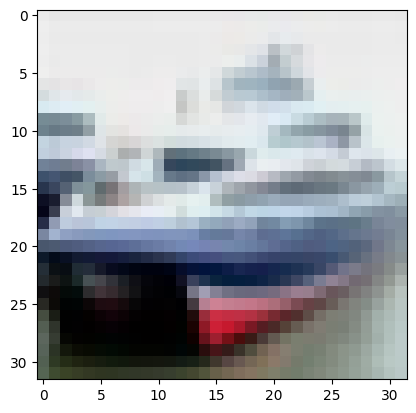

In [ ]:
plt.imshow(test_images[1])

In [ ]:
#calculating fearure_map
from numpy import expand_dims
image = expand_dims(test_images[1], axis=0)
features = model.predict(image)
features

1/1 [==============================] - 0s 38ms/step


array([[[[0.06021817, 0.03838234, 0.0236189 , ..., 0.04301261,
          0.12633726, 0.        ],
         [0.05882539, 0.06120933, 0.00993996, ..., 0.03701583,
          0.12640947, 0.        ],
         [0.05907609, 0.05948161, 0.01161878, ..., 0.03699604,
          0.12368494, 0.        ],
         ...,
         [0.05881057, 0.06592948, 0.01574079, ..., 0.03831051,
          0.12392228, 0.        ],
         [0.0586534 , 0.06619614, 0.00832405, ..., 0.03544282,
          0.12345196, 0.        ],
         [0.0593742 , 0.05296642, 0.00746803, ..., 0.03554205,
          0.12369098, 0.        ]],

        [[0.06169267, 0.04078927, 0.02163441, ..., 0.02827024,
          0.11877383, 0.        ],
         [0.0603268 , 0.06113478, 0.01183654, ..., 0.02402921,
          0.11734486, 0.        ],
         [0.0603268 , 0.06113478, 0.01183654, ..., 0.02402921,
          0.11734486, 0.        ],
         ...,
         [0.05995909, 0.06860178, 0.01593703, ..., 0.02812693,
          0.11479694, 0. 

1/1 [==============================] - 0s 31ms/step


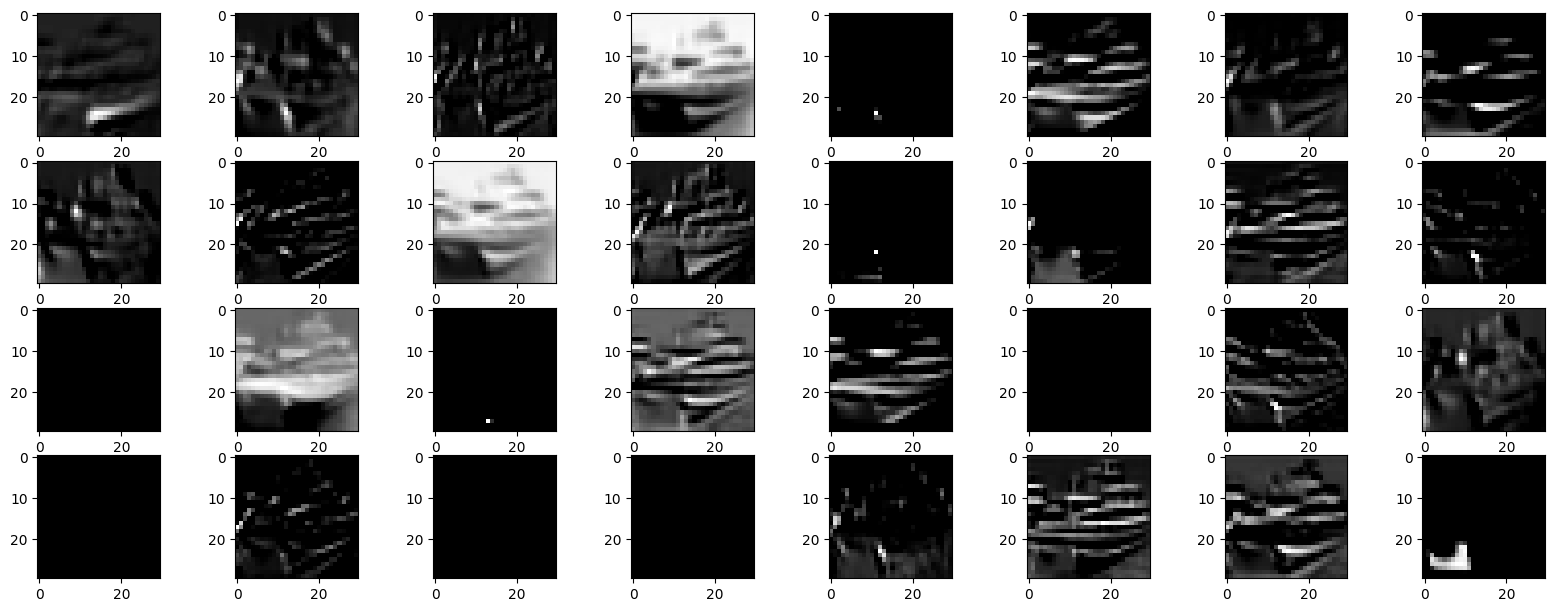

In [ ]:
#visualizing the features_map

#the result will be a feature map with 30x30x32. We can plot all 32 two-dimensional images as an 8×8 square of images.

features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()